In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
path = './data/'
column_template_2 = 'column_heading_template_earnings.csv'
path2 = './data_documentation/'
input_file_for_earnings = 'clean_earnings_df.csv'

In [190]:
column_headings_template_df = pd.read_csv(path2 +column_template_2)
column_headings_template_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
235      student                      Poverty rate, via Census data   
236      student                        Share of dependent students   
237      student                           Share of female students   
238      student                 Share of first-generation students   
239      student                          Share of married students   

                      developer-friendly name API data type VARIABLE NAME  
0               program.bachelors.agriculture       integer    CIP01BACHL  
1              program.bachelors.architecture       integer    CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer    CIP05BACHL  
3                program.bachelors.biological       integer    CIP26BACHL  
4        program.bachelors.business_marketing       integer    CIP52BACHL  
..                                        ...           ...           ...  
235                 demographics.poverty_rate         float  POVERTY_RATE  
236                    demographics.dependent         float     DEPENDENT  
237                 demographics.female_share         float        FEMALE  
238             demographics.first_generation         float     FIRST_GEN  
239                      demographics.married         float       MARRIED  

[240 rows x 5 columns]

In [4]:
column_headings_for_earnings_summary = column_headings_template_df['VARIABLE NAME'].to_list()
column_heading_df = column_headings_template_df
column_headings_for_earnings_summary

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',


In [5]:
#this input file is ready to go.
filtered_4_year_df = pd.read_csv(path2 + input_file_for_earnings, index_col = 0)
filtered_4_year_df = filtered_4_year_df.fillna(0)

In [6]:
#here is where we apply the columns to filter the dataframe.
filtered_4_year_df = filtered_4_year_df[column_headings_for_earnings_summary]

In [7]:
filtered_4_year_df

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0              1           1           0           1           2           0   
1              0           0           1           1           2           1   
2              0           0           0           0           2           0   
3              0           0           0           1           1           1   
4              0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
5911           0           0           0           0           1           1   
5912           0           0           0           0           1           0   
5914           0           0           0           0           0           0   
5918           0           0           0           1           1           1   
5931           0           0           0           0           0           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
0              1           1           0           1  ...          3.79   
1              0           1           0           1  ...          2.03   
2              0           0           0           0  ...          6.94   
3              0           1           0           1  ...          2.55   
4              0           1           0           1  ...          4.09   
...          ...         ...         ...         ...  ...           ...   
5911           0           1           0           0  ...          0.00   
5912           0           1           0           0  ...          0.00   
5914           0           0           0           0  ...          0.00   
5918           0           1           0           0  ...          0.00   
5931           0           0           0           0  ...          0.00   

      PCT_WHITE  PCT_BORN_US  PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
0     46.840000    94.739998   13.00   0.0758     14.880000   0.901130   
1     69.019997    96.500000   15.93   0.2296     10.910000   0.678591   
2     70.879997    94.089996   13.23   0.8302     10.650000   0.104730   
3     76.379997    95.269997   17.67   0.1842      9.370000   0.748430   
4     42.689999    94.529999   11.81   0.0848     16.959999   0.892572   
...         ...          ...     ...      ...           ...        ...   
5911   0.000000     0.000000    0.00   0.9634      0.000000   0.081275   
5912   0.000000     0.000000    0.00   0.9291      0.000000   0.081275   
5914   0.000000     0.000000    0.00   0.4764      0.000000   0.544399   
5918   0.000000     0.000000    0.00   0.4652      0.000000   0.364462   
5931   0.000000     0.000000    0.00   0.6026      0.000000   0.336575   

        FEMALE  FIRST_GEN   MARRIED  
0     0.564030   0.365828  0.009102  
1     0.639091   0.341224  0.105087  
2     0.648649   0.512500  0.236486  
3     0.476350   0.310132  0.100460  
4     0.613419   0.343434  0.007987  
...        ...        ...       ...  
5911  0.697281   0.543534  0.284437  
5912  0.697281   0.543534  0.284437  
5914  0.679629   0.686430  0.081834  
5918  0.733679   0.578134  0.177259  
5931  0.797790   0.397344  0.213039  

[1826 rows x 240 columns]

In [8]:
filtered_4_year_df['MN_EARN_WNE_P6']

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: int64

In [9]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [10]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: int64

In [11]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [12]:
column_list

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',


In [13]:
len(column_list)

240

In [14]:
#filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [15]:
X = filtered_4_year_df.fillna(0)
filtered_4_year_df = filtered_4_year_df.drop(columns = 'MN_EARN_WNE_P6')
X = filtered_4_year_df
X_base_line = X

In [16]:
print(X.shape, y.shape)

(1826, 239) (1826,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [19]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.826941534100368

In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([3.96794457e-05, 1.29074557e-04, 1.17473982e-04, 2.74607093e-04,
       5.29174176e-04, 2.03312160e-04, 9.60879512e-05, 5.51471653e-04,
       1.18291767e-07, 3.45876674e-04, 4.17280747e-04, 8.28491419e-05,
       9.48989572e-05, 7.33424284e-05, 1.98286892e-04, 8.59387760e-04,
       2.79129970e-04, 1.10758394e-04, 1.60504861e-04, 3.85122260e-04,
       3.48652493e-06, 1.15420506e-04, 1.73408833e-05, 9.04802422e-05,
       1.61697616e-04, 9.08847554e-05, 1.89199220e-04, 3.07578592e-05,
       2.18244572e-04, 1.99083253e-04, 2.43539087e-06, 8.93648004e-04,
       2.40921485e-04, 7.63344486e-06, 3.89615234e-04, 1.42903374e-04,
       3.35226163e-04, 2.27989793e-03, 0.00000000e+00, 7.94770695e-05,
       6.62087142e-04, 1.06132749e-03, 7.64037394e-03, 6.95799277e-03,
       1.84167744e-03, 1.10203090e-04, 7.39891641e-03, 8.52596900e-06,
       3.27875829e-03, 1.50821647e-03, 1.97246363e-02, 2.68563620e-03,
       2.54300805e-04, 1.14921666e-03, 6.13414395e-02, 1.69222691e-03,
      

In [21]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.259585622777378, 'WDRAW_ORIG_YR2_RT'),
 (0.10233908596618134, 'MN_EARN_WNE_P6'),
 (0.10226542863110907, 'AGE_ENTRY'),
 (0.061341439531758024, 'PCIP51'),
 (0.048906740154134605, 'WOMENONLY'),
 (0.03949332624786869, 'LOCALE'),
 (0.026589171380369113, 'PCIP50'),
 (0.019724636332770006, 'PCIP14'),
 (0.010197766148727576, 'INC_PCT_M1'),
 (0.008413996391424374, 'MD_FAMINC'),
 (0.008378114491798221, 'SATMT25'),
 (0.007802874376333345, 'INC_PCT_M2'),
 (0.007640373939545805, 'PCIP26'),
 (0.007398916405968491, 'PCIP11'),
 (0.007364268809822635, 'FEMALE'),
 (0.007351075084982926, 'PCIP42'),
 (0.007305336403523233, 'DEPENDENT'),
 (0.007144972376289522, 'POVERTY_RATE'),
 (0.007050320241507712, 'DEP_COMP_ORIG_YR6_RT'),
 (0.007029473320126148, 'REGION'),
 (0.006957992773371532, 'PCIP52'),
 (0.006780653346476181, 'FIRST_GEN'),
 (0.006399717736222444, 'FAMINC_IND'),
 (0.006284259458049545, 'PCT_BA'),
 (0.006282456390616508, 'PCT_GRAD_PROF'),
 (0.006262771427412061, 'PCIP49'),
 (0.006257860904485636

In [22]:
#X['IND_RPY_1YR_RT']

In [23]:
column_list_a = X.columns.to_list()

In [24]:
print(X.shape, y.shape)

(1826, 239) (1826,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8292340138596518

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([3.65460559e-05, 3.47483776e-04, 5.83151454e-05, 3.25966250e-04,
       6.07635703e-04, 2.35794649e-04, 4.97635717e-05, 4.46552789e-04,
       2.01376499e-09, 5.29321507e-04, 3.43885670e-04, 3.64542098e-04,
       6.50554854e-05, 8.82764676e-05, 6.15051317e-05, 3.10679383e-03,
       1.88206633e-04, 1.62695514e-04, 6.35162865e-05, 4.60787899e-04,
       3.82391584e-06, 2.21608329e-04, 4.07890011e-06, 9.22289335e-05,
       9.89879633e-05, 2.43447376e-04, 9.90975661e-05, 4.95956285e-05,
       7.45812955e-05, 2.26147287e-04, 1.11955214e-06, 6.01741151e-04,
       1.97208406e-04, 1.20751261e-06, 3.90255138e-04, 2.52421221e-04,
       2.86050111e-04, 1.55384273e-03, 2.20740318e-05, 9.82160368e-05,
       1.36217833e-04, 4.23634404e-04, 6.74401479e-03, 7.23332254e-03,
       2.28743963e-03, 1.09995540e-04, 9.15850643e-03, 1.05475986e-09,
       3.65073970e-03, 1.25296799e-03, 2.17959804e-02, 3.15586509e-03,
       2.32409867e-04, 1.09117130e-03, 5.13538693e-02, 1.73325212e-03,
      

In [28]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.2768884620941968, 'WDRAW_ORIG_YR2_RT'),
 (0.10388121145414904, 'FAMINC_IND'),
 (0.07768544763096505, 'AVGFACSAL'),
 (0.053143107605654855, 'TUITFTE'),
 (0.051353869313531475, 'PCIP51'),
 (0.04732705836811168, 'INEXPFTE'),
 (0.03548411275746623, 'PCIP50'),
 (0.021795980379372245, 'PCIP14'),
 (0.009952944900924842, 'INC_PCT_M2'),
 (0.009946315153679676, 'MARRIED'),
 (0.009158506430941547, 'PCIP11'),
 (0.008482522647330843, 'FEMALE'),
 (0.008017769689231605, 'DEP_COMP_ORIG_YR6_RT'),
 (0.007745507571548308, 'FIRST_GEN'),
 (0.007233322543312751, 'PCIP52'),
 (0.006958304131851643, 'INC_PCT_H2'),
 (0.006869382772952431, 'UGDS'),
 (0.006766916157735941, 'PCT_ASIAN'),
 (0.006744014792792719, 'PCIP26'),
 (0.0065911053830159955, 'MEDIAN_HH_INC'),
 (0.006382761403678482, 'INC_PCT_H1'),
 (0.006366892570632365, 'SATMTMID'),
 (0.006231164627235203, 'FAMINC'),
 (0.006203833113474717, 'LOAN_EVER'),
 (0.00586841136988132, 'PCTFLOAN'),
 (0.005866032750763456, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.00581113

In [29]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.2768884620941968, 'WDRAW_ORIG_YR2_RT')
(0.10388121145414904, 'FAMINC_IND')
(0.07768544763096505, 'AVGFACSAL')
(0.053143107605654855, 'TUITFTE')
(0.051353869313531475, 'PCIP51')
(0.04732705836811168, 'INEXPFTE')
(0.03548411275746623, 'PCIP50')
(0.021795980379372245, 'PCIP14')
(0.009952944900924842, 'INC_PCT_M2')
(0.009946315153679676, 'MARRIED')
(0.009158506430941547, 'PCIP11')
(0.008482522647330843, 'FEMALE')
(0.008017769689231605, 'DEP_COMP_ORIG_YR6_RT')
(0.007745507571548308, 'FIRST_GEN')
(0.007233322543312751, 'PCIP52')
(0.006958304131851643, 'INC_PCT_H2')
(0.006869382772952431, 'UGDS')
(0.006766916157735941, 'PCT_ASIAN')
(0.006744014792792719, 'PCIP26')
(0.0065911053830159955, 'MEDIAN_HH_INC')
(0.006382761403678482, 'INC_PCT_H1')
(0.006366892570632365, 'SATMTMID')
(0.006231164627235203, 'FAMINC')
(0.006203833113474717, 'LOAN_EVER')
(0.00586841136988132, 'PCTFLOAN')
(0.005866032750763456, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.005811134788077456, 'DEPENDENT')
(0.005471736277175187, 'AGEG

In [30]:
a_drop_list

['CIP31BACHL',
 'CIP30BACHL',
 'PCIP01',
 'NPT4_3075_PUB',
 'ACTWR75',
 'CIP29BACHL',
 'ACTWR25',
 'NUM43_PUB',
 'CIP19BACHL',
 'NUM41_PUB',
 'CIP38BACHL',
 'PCIP29',
 'CIP23BACHL',
 'NPT41_PUB',
 'CIP22BACHL',
 'CIP16BACHL',
 'CIP05BACHL',
 'CIP10BACHL',
 'CIP12BACHL',
 'ACTWRMID',
 'CIP01BACHL',
 'PCIP12',
 'PCIP47',
 'PRGMOFR',
 'MENONLY',
 'WOMENONLY',
 'CIPTFBS1',
 'PCIP25',
 'CURROPER',
 'CIPTFBSANNUAL1',
 'CIP47BACHL',
 'PCIP48',
 'CIP25BACHL',
 'PCIP41',
 'CIP41BACHL',
 'CIP48BACHL',
 'CIP46BACHL',
 'PCIP46',
 'UG',
 'TUITIONFEE_PROG',
 'PREDDEG',
 'NUM4_PROG',
 'NUM4_OTHER',
 'NUM45_PROG',
 'NUM45_OTHER',
 'NUM44_PROG',
 'NUM44_OTHER',
 'NUM43_PROG',
 'NUM43_OTHER',
 'NUM42_PROG',
 'NUM42_OTHER',
 'NUM41_PROG',
 'NUM41_OTHER',
 'NPT4_PROG',
 'NPT4_OTHER',
 'NPT4_75UP_PROG',
 'NPT4_75UP_OTHER',
 'NPT4_3075_PROG',
 'NPT4_3075_OTHER',
 'NPT4_048_PROG',
 'NPT4_048_OTHER',
 'NPT45_PROG',
 'NPT45_OTHER',
 'NPT44_PROG',
 'NPT44_OTHER',
 'NPT43_PROG',
 'NPT43_OTHER',
 'NPT42_PROG',
 '

In [31]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [32]:
filtered_4_year_b_df

CIP04BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  CIP11BACHL  CIP13BACHL  \
0              1           1           2           0           1           1   
1              0           1           2           1           1           1   
2              0           0           2           0           0           0   
3              0           1           1           1           1           1   
4              0           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
5911           0           0           1           1           1           0   
5912           0           0           1           0           1           0   
5914           0           0           0           0           0           0   
5918           0           1           1           1           1           0   
5931           0           0           0           0           0           0   

      CIP15BACHL  CIP14BACHL  CIP51BACHL  CIP54BACHL  ...  PCT_HISPANIC  \
0              1           1           0           0  ...          3.79   
1              0           1           2           1  ...          2.03   
2              0           0           0           0  ...          6.94   
3              0           1           2           1  ...          2.55   
4              0           1           1           1  ...          4.09   
...          ...         ...         ...         ...  ...           ...   
5911           0           0           1           0  ...          0.00   
5912           0           0           1           0  ...          0.00   
5914           0           0           1           0  ...          0.00   
5918           0           0           1           0  ...          0.00   
5931           0           0           1           0  ...          0.00   

      PCT_WHITE  PCT_BORN_US  PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
0     46.840000    94.739998   13.00   0.0758     14.880000   0.901130   
1     69.019997    96.500000   15.93   0.2296     10.910000   0.678591   
2     70.879997    94.089996   13.23   0.8302     10.650000   0.104730   
3     76.379997    95.269997   17.67   0.1842      9.370000   0.748430   
4     42.689999    94.529999   11.81   0.0848     16.959999   0.892572   
...         ...          ...     ...      ...           ...        ...   
5911   0.000000     0.000000    0.00   0.9634      0.000000   0.081275   
5912   0.000000     0.000000    0.00   0.9291      0.000000   0.081275   
5914   0.000000     0.000000    0.00   0.4764      0.000000   0.544399   
5918   0.000000     0.000000    0.00   0.4652      0.000000   0.364462   
5931   0.000000     0.000000    0.00   0.6026      0.000000   0.336575   

        FEMALE  FIRST_GEN   MARRIED  
0     0.564030   0.365828  0.009102  
1     0.639091   0.341224  0.105087  
2     0.648649   0.512500  0.236486  
3     0.476350   0.310132  0.100460  
4     0.613419   0.343434  0.007987  
...        ...        ...       ...  
5911  0.697281   0.543534  0.284437  
5912  0.697281   0.543534  0.284437  
5914  0.679629   0.686430  0.081834  
5918  0.733679   0.578134  0.177259  
5931  0.797790   0.397344  0.213039  

[1826 rows x 151 columns]

In [33]:
X = filtered_4_year_b_df

In [34]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [35]:
print(X.shape, y.shape)

(1826, 151) (1826,)


In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8209633126965523

In [38]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.2610571784781503, 'WDRAW_ORIG_YR2_RT'),
 (0.1033319201801855, 'FAMINC_IND'),
 (0.08679917184822263, 'AVGFACSAL'),
 (0.05617889287301663, 'TUITFTE'),
 (0.05375325661135606, 'PCIP51'),
 (0.04363485404859081, 'INEXPFTE'),
 (0.038426880109046754, 'PCIP50'),
 (0.021572052793960315, 'PCIP14'),
 (0.010096321056706103, 'INC_PCT_M2'),
 (0.008603118353217537, 'INC_PCT_H1'),
 (0.00829590860377239, 'DEP_COMP_ORIG_YR6_RT'),
 (0.008294476906532134, 'ADM_RATE_ALL'),
 (0.007796938178369791, 'DEPENDENT'),
 (0.007685898921679015, 'SATMT25'),
 (0.007275943217990001, 'FEMALE'),
 (0.007111102084608804, 'INC_PCT_H2'),
 (0.00706920021467082, 'MEDIAN_HH_INC'),
 (0.006863166992454605, 'PCIP26'),
 (0.0068360309669446, 'PCIP11'),
 (0.006780185082470561, 'MARRIED'),
 (0.006716282739568623, 'LOAN_EVER'),
 (0.006678991589582262, 'PCIP52'),
 (0.006355096978090295, 'PCTFLOAN'),
 (0.006285219398614318, 'PCIP49'),
 (0.006268462421381522, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.006218383562712461, 'AGE_ENTRY'),
 (0.0061960

In [39]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.2610571784781503, 'WDRAW_ORIG_YR2_RT')
(0.1033319201801855, 'FAMINC_IND')
(0.08679917184822263, 'AVGFACSAL')
(0.05617889287301663, 'TUITFTE')
(0.05375325661135606, 'PCIP51')
(0.04363485404859081, 'INEXPFTE')
(0.038426880109046754, 'PCIP50')
(0.021572052793960315, 'PCIP14')
(0.010096321056706103, 'INC_PCT_M2')
(0.008603118353217537, 'INC_PCT_H1')
(0.00829590860377239, 'DEP_COMP_ORIG_YR6_RT')
(0.008294476906532134, 'ADM_RATE_ALL')
(0.007796938178369791, 'DEPENDENT')
(0.007685898921679015, 'SATMT25')
(0.007275943217990001, 'FEMALE')
(0.007111102084608804, 'INC_PCT_H2')
(0.00706920021467082, 'MEDIAN_HH_INC')
(0.006863166992454605, 'PCIP26')
(0.0068360309669446, 'PCIP11')
(0.006780185082470561, 'MARRIED')
(0.006716282739568623, 'LOAN_EVER')
(0.006678991589582262, 'PCIP52')
(0.006355096978090295, 'PCTFLOAN')
(0.006285219398614318, 'PCIP49')
(0.006268462421381522, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.006218383562712461, 'AGE_ENTRY')
(0.006196088807965125, 'PCT_ASIAN')
(0.005944854421692679, 'UGD

In [40]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [41]:
X = filtered_4_year_c_df

In [42]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [43]:
print(X.shape, y.shape)

(1826, 90) (1826,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8270644633638917

In [46]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.260086097703879, 'WDRAW_ORIG_YR2_RT'),
 (0.10389657221887373, 'FAMINC_IND'),
 (0.09707352330554798, 'AVGFACSAL'),
 (0.056720853339888286, 'PCIP51'),
 (0.0468928396032903, 'TUITFTE'),
 (0.04581726636257639, 'INEXPFTE'),
 (0.03255134982384, 'PCIP50'),
 (0.02087813500196122, 'PCIP14'),
 (0.0098091255853407, 'INC_PCT_M2'),
 (0.008565553128310489, 'FEMALE'),
 (0.00830483521885733, 'INC_PCT_H2'),
 (0.008280098246540805, 'DEP_COMP_ORIG_YR6_RT'),
 (0.008145595743333445, 'PCIP11'),
 (0.00776820451063682, 'SATMTMID'),
 (0.007503340676285269, 'DEPENDENT'),
 (0.007455959115554358, 'PCIP42'),
 (0.007291980700249962, 'LOAN_EVER'),
 (0.0072370363429057945, 'ADM_RATE_ALL'),
 (0.007151469990938525, 'PCIP49'),
 (0.007054813382010842, 'AGEGE24'),
 (0.006971261782846336, 'INC_PCT_H1'),
 (0.006939073672360537, 'UGDS'),
 (0.006936449601189858, 'AGE_ENTRY'),
 (0.006876499769770209, 'PCIP26'),
 (0.006830116118215114, 'MEDIAN_HH_INC'),
 (0.006774648701841404, 'PCIP52'),
 (0.006732863499292471, 'PCTFLOAN'),

In [47]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.260086097703879, 'WDRAW_ORIG_YR2_RT')
(0.10389657221887373, 'FAMINC_IND')
(0.09707352330554798, 'AVGFACSAL')
(0.056720853339888286, 'PCIP51')
(0.0468928396032903, 'TUITFTE')
(0.04581726636257639, 'INEXPFTE')
(0.03255134982384, 'PCIP50')
(0.02087813500196122, 'PCIP14')
(0.0098091255853407, 'INC_PCT_M2')
(0.008565553128310489, 'FEMALE')
(0.00830483521885733, 'INC_PCT_H2')
(0.008280098246540805, 'DEP_COMP_ORIG_YR6_RT')
(0.008145595743333445, 'PCIP11')
(0.00776820451063682, 'SATMTMID')
(0.007503340676285269, 'DEPENDENT')
(0.007455959115554358, 'PCIP42')
(0.007291980700249962, 'LOAN_EVER')
(0.0072370363429057945, 'ADM_RATE_ALL')
(0.007151469990938525, 'PCIP49')
(0.007054813382010842, 'AGEGE24')
(0.006971261782846336, 'INC_PCT_H1')
(0.006939073672360537, 'UGDS')
(0.006936449601189858, 'AGE_ENTRY')
(0.006876499769770209, 'PCIP26')
(0.006830116118215114, 'MEDIAN_HH_INC')
(0.006774648701841404, 'PCIP52')
(0.006732863499292471, 'PCTFLOAN')
(0.006713797403812805, 'FTFTPCTFLOAN_POOLED_SUPP')
(0

In [48]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [49]:
X = filtered_4_year_d_df

In [50]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [51]:
print(X.shape, y.shape)

(1826, 38) (1826,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

0.8395098773811371

In [54]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.2766023058955382, 'WDRAW_ORIG_YR2_RT'),
 (0.10771418208115423, 'FAMINC_IND'),
 (0.0934301271845084, 'AVGFACSAL'),
 (0.06398827865720268, 'PCIP51'),
 (0.053823048029122474, 'TUITFTE'),
 (0.048082673208986446, 'INEXPFTE'),
 (0.03408527043733534, 'PCIP50'),
 (0.024811630522674467, 'PCIP14'),
 (0.016039335227066957, 'INC_PCT_M2'),
 (0.013333387941751066, 'SATMTMID'),
 (0.013154597905641685, 'SATMT25'),
 (0.013073022243842962, 'MEDIAN_HH_INC'),
 (0.011982782777835157, 'FIRST_GEN'),
 (0.011722112570236927, 'INC_PCT_H2'),
 (0.011199995305307926, 'SAT_AVG_ALL'),
 (0.011165909381958732, 'FEMALE'),
 (0.010843813649275247, 'AGEGE24'),
 (0.010723985301860622, 'PCTFLOAN'),
 (0.01069242073555938, 'UGDS'),
 (0.010223710439415548, 'PCIP52'),
 (0.010186959675676772, 'DEP_COMP_ORIG_YR6_RT'),
 (0.010093561019368915, 'PCT_ASIAN'),
 (0.00967275245572319, 'INC_PCT_H1'),
 (0.009654744599780192, 'PCIP42'),
 (0.00951584671963655, 'PCIP26'),
 (0.00932061287867032, 'PCIP11'),
 (0.00923480027500176, 'FTFTPCTF

In [55]:
column_heading_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
235      student                      Poverty rate, via Census data   
236      student                        Share of dependent students   
237      student                           Share of female students   
238      student                 Share of first-generation students   
239      student                          Share of married students   

                      developer-friendly name API data type VARIABLE NAME  
0               program.bachelors.agriculture       integer    CIP01BACHL  
1              program.bachelors.architecture       integer    CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer    CIP05BACHL  
3                program.bachelors.biological       integer    CIP26BACHL  
4        program.bachelors.business_marketing       integer    CIP52BACHL  
..                                        ...           ...           ...  
235                 demographics.poverty_rate         float  POVERTY_RATE  
236                    demographics.dependent         float     DEPENDENT  
237                 demographics.female_share         float        FEMALE  
238             demographics.first_generation         float     FIRST_GEN  
239                      demographics.married         float       MARRIED  

[240 rows x 5 columns]

In [56]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [57]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [58]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2766023058955382
WDRAW_ORIG_YR2_RT
0.10771418208115423
FAMINC_IND
0.0934301271845084
AVGFACSAL
0.06398827865720268
PCIP51
0.053823048029122474
TUITFTE
0.048082673208986446
INEXPFTE
0.03408527043733534
PCIP50
0.024811630522674467
PCIP14
0.016039335227066957
INC_PCT_M2
0.013333387941751066
SATMTMID
0.013154597905641685
SATMT25
0.013073022243842962
MEDIAN_HH_INC
0.011982782777835157
FIRST_GEN
0.011722112570236927
INC_PCT_H2
0.011199995305307926
SAT_AVG_ALL
0.011165909381958732
FEMALE
0.010843813649275247
AGEGE24
0.010723985301860622
PCTFLOAN
0.01069242073555938
UGDS
0.010223710439415548
PCIP52
0.010186959675676772
DEP_COMP_ORIG_YR6_RT
0.010093561019368915
PCT_ASIAN
0.00967275245572319
INC_PCT_H1
0.009654744599780192
PCIP42
0.00951584671963655
PCIP26
0.00932061287867032
PCIP11
0.00923480027500176
FTFTPCTFLOAN_POOLED_SUPP
0.009225630118156785
DEPENDENT
0.008766071505087136
ADM_RATE_ALL
0.008611737509561368
LOAN_EVER
0.008560194632895299
PCT_BORN_US
0.008085316294414478
MARRIED
0.008076115

In [59]:
random_forest_summary_df

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.276602   
1                 FAMINC_IND    0.107714   
2                  AVGFACSAL    0.093430   
3                     PCIP51    0.063988   
4                    TUITFTE    0.053823   
5                   INEXPFTE    0.048083   
6                     PCIP50    0.034085   
7                     PCIP14    0.024812   
8                 INC_PCT_M2    0.016039   
9                   SATMTMID    0.013333   
10                   SATMT25    0.013155   
11             MEDIAN_HH_INC    0.013073   
12                 FIRST_GEN    0.011983   
13                INC_PCT_H2    0.011722   
14               SAT_AVG_ALL    0.011200   
15                    FEMALE    0.011166   
16                   AGEGE24    0.010844   
17                  PCTFLOAN    0.010724   
18                      UGDS    0.010692   
19                    PCIP52    0.010224   
20      DEP_COMP_ORIG_YR6_RT    0.010187   
21                 PCT_ASIAN    0.010094   
22                INC_PCT_H1    0.009673   
23                    PCIP42    0.009655   
24                    PCIP26    0.009516   
25                    PCIP11    0.009321   
26  FTFTPCTFLOAN_POOLED_SUPP    0.009235   
27                 DEPENDENT    0.009226   
28              ADM_RATE_ALL    0.008766   
29                 LOAN_EVER    0.008612   
30               PCT_BORN_US    0.008560   
31                   MARRIED    0.008085   
32                    FAMINC    0.008076   
33                   UG25ABV    0.007804   
34                 AGE_ENTRY    0.007175   
35                    PCIP49    0.006742   
36                 MD_FAMINC    0.006659   
37                  CCSIZSET    0.005923   

                        developer-friendly-name  \
0                    title_iv.withdrawn_by.2yrs   
1   demographics.avg_family_income_independents   
2                                faculty_salary   
3                     program_percentage.health   
4                       tuition_revenue_per_fte   
5             instructional_expenditure_per_fte   
6          program_percentage.visual_performing   
7                program_percentage.engineering   
8                share_middleincome.48001_75000   
9                      sat_scores.midpoint.math   
10              sat_scores.25th_percentile.math   
11                demographics.median_hh_income   
12                demographics.first_generation   
13                  share_highincome.110001plus   
14                 sat_scores.average.by_ope_id   
15                    demographics.female_share   
16                demographics.over_23_at_entry   
17                            federal_loan_rate   
18                                         size   
19        program_percentage.business_marketing   
20            title_iv.depend.completed_by.6yrs   
21            demographics.share_asian.home_ZIP   
22                share_highincome.75001_110000   
23                program_percentage.psychology   
24                program_percentage.biological   
25                  program_percentage.computer   
26                ftft_federal_loan_rate_pooled   
27                       demographics.dependent   
28                     admission_rate.by_ope_id   
29                       students_with_any_loan   
30          demographics.share_born_US.home_ZIP   
31                         demographics.married   
32               demographics.avg_family_income   
33                               share_25_older   
34                       demographics.age_entry   
35            program_percentage.transportation   
36            demographics.median_family_income   
37                        carnegie_size_setting   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   214    Average family income for independent s...   
2   187    Average faculty salary
Name: NAME OF DA...   
3   54    Percentage of degrees awarded in Health ...   
4   203    Net tuition 

In [60]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [61]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FAMINC_IND
dropping AVGFACSAL
dropping INC_PCT_M2
dropping SATMTMID
dropping SATMT25
dropping MEDIAN_HH_INC
dropping FIRST_GEN
dropping INC_PCT_H2
dropping UGDS
dropping DEP_COMP_ORIG_YR6_RT
dropping LOAN_EVER


In [62]:
filtered_4_year_e_df

PCIP26  PCIP52  PCIP11  PCIP14  PCIP51  PCIP42  PCIP49  PCIP50  \
0     0.0927  0.1578  0.0592  0.1183  0.0000  0.0631     0.0  0.0237   
1     0.0876  0.1908  0.0139  0.0813  0.2255  0.0602     0.0  0.0339   
2     0.0000  0.4615  0.0000  0.0000  0.0000  0.0000     0.0  0.0000   
3     0.0436  0.2108  0.0590  0.2892  0.1543  0.0202     0.0  0.0380   
4     0.0831  0.1062  0.0585  0.0000  0.1677  0.0600     0.0  0.0585   
...      ...     ...     ...     ...     ...     ...     ...     ...   
5911  0.0000  0.6000  0.0941  0.0000  0.0471  0.0000     0.0  0.0000   
5912  0.0000  0.2000  0.0364  0.0000  0.3455  0.0000     0.0  0.0000   
5914  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000     0.0  0.0000   
5918  0.0070  0.2661  0.0070  0.0000  0.0139  0.1235     0.0  0.0000   
5931  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000     0.0  0.0000   

      ADM_RATE_ALL  SAT_AVG_ALL  ...  AGE_ENTRY        FAMINC  MD_FAMINC  \
0           0.8986        957.0  ...  20.283741  32362.826114    23553.0   
1           0.9211       1220.0  ...  23.607975  51306.674306    34489.0   
2           0.0000          0.0  ...  33.672297  21079.472973    15033.5   
3           0.8087       1314.0  ...  22.727920  61096.588949    44787.0   
4           0.9774        972.0  ...  20.130990  31684.382188    22080.5   
...            ...          ...  ...        ...           ...        ...   
5911        0.0000          0.0  ...  32.048956  25959.118161    18602.0   
5912        0.0000          0.0  ...  32.048956  25959.118161    18602.0   
5914        0.0000          0.0  ...  24.857806   7753.167150        0.0   
5918        0.8311        992.0  ...  28.955037  30498.626027    24968.0   
5931        0.9522          0.0  ...  27.762652  45983.974807    29657.0   

      AGEGE24  PCT_ASIAN  PCT_BORN_US  UG25ABV  DEPENDENT    FEMALE   MARRIED  
0        0.08       1.48    94.739998   0.0758   0.901130  0.564030  0.009102  
1        0.26       1.10    96.500000   0.2296   0.678591  0.639091  0.105087  
2        0.83       1.29    94.089996   0.8302   0.104730  0.648649  0.236486  
3        0.29       1.42    95.269997   0.1842   0.748430  0.476350  0.100460  
4        0.11       1.41    94.529999   0.0848   0.892572  0.613419  0.007987  
...       ...        ...          ...      ...        ...       ...       ...  
5911     0.00       0.00     0.000000   0.9634   0.081275  0.697281  0.284437  
5912     0.00       0.00     0.000000   0.9291   0.081275  0.697281  0.284437  
5914     0.00       0.00     0.000000   0.4764   0.544399  0.679629  0.081834  
5918     0.00       0.00     0.000000   0.4652   0.364462  0.733679  0.177259  
5931     0.00       0.00     0.000000   0.6026   0.336575  0.797790  0.213039  

[1826 rows x 27 columns]

In [63]:
random_forest_summary_df

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.276602   
1                 FAMINC_IND    0.107714   
2                  AVGFACSAL    0.093430   
3                     PCIP51    0.063988   
4                    TUITFTE    0.053823   
5                   INEXPFTE    0.048083   
6                     PCIP50    0.034085   
7                     PCIP14    0.024812   
8                 INC_PCT_M2    0.016039   
9                   SATMTMID    0.013333   
10                   SATMT25    0.013155   
11             MEDIAN_HH_INC    0.013073   
12                 FIRST_GEN    0.011983   
13                INC_PCT_H2    0.011722   
14               SAT_AVG_ALL    0.011200   
15                    FEMALE    0.011166   
16                   AGEGE24    0.010844   
17                  PCTFLOAN    0.010724   
18                      UGDS    0.010692   
19                    PCIP52    0.010224   
20      DEP_COMP_ORIG_YR6_RT    0.010187   
21                 PCT_ASIAN    0.010094   
22                INC_PCT_H1    0.009673   
23                    PCIP42    0.009655   
24                    PCIP26    0.009516   
25                    PCIP11    0.009321   
26  FTFTPCTFLOAN_POOLED_SUPP    0.009235   
27                 DEPENDENT    0.009226   
28              ADM_RATE_ALL    0.008766   
29                 LOAN_EVER    0.008612   
30               PCT_BORN_US    0.008560   
31                   MARRIED    0.008085   
32                    FAMINC    0.008076   
33                   UG25ABV    0.007804   
34                 AGE_ENTRY    0.007175   
35                    PCIP49    0.006742   
36                 MD_FAMINC    0.006659   
37                  CCSIZSET    0.005923   

                        developer-friendly-name  \
0                    title_iv.withdrawn_by.2yrs   
1   demographics.avg_family_income_independents   
2                                faculty_salary   
3                     program_percentage.health   
4                       tuition_revenue_per_fte   
5             instructional_expenditure_per_fte   
6          program_percentage.visual_performing   
7                program_percentage.engineering   
8                share_middleincome.48001_75000   
9                      sat_scores.midpoint.math   
10              sat_scores.25th_percentile.math   
11                demographics.median_hh_income   
12                demographics.first_generation   
13                  share_highincome.110001plus   
14                 sat_scores.average.by_ope_id   
15                    demographics.female_share   
16                demographics.over_23_at_entry   
17                            federal_loan_rate   
18                                         size   
19        program_percentage.business_marketing   
20            title_iv.depend.completed_by.6yrs   
21            demographics.share_asian.home_ZIP   
22                share_highincome.75001_110000   
23                program_percentage.psychology   
24                program_percentage.biological   
25                  program_percentage.computer   
26                ftft_federal_loan_rate_pooled   
27                       demographics.dependent   
28                     admission_rate.by_ope_id   
29                       students_with_any_loan   
30          demographics.share_born_US.home_ZIP   
31                         demographics.married   
32               demographics.avg_family_income   
33                               share_25_older   
34                       demographics.age_entry   
35            program_percentage.transportation   
36            demographics.median_family_income   
37                        carnegie_size_setting   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   214    Average family income for independent s...   
2   187    Average faculty salary
Name: NAME OF DA...   
3   54    Percentage of degrees awarded in Health ...   
4   203    Net tuition 

In [64]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [65]:
column_list_e

['PCIP26',
 'PCIP52',
 'PCIP11',
 'PCIP14',
 'PCIP51',
 'PCIP42',
 'PCIP49',
 'PCIP50',
 'ADM_RATE_ALL',
 'SAT_AVG_ALL',
 'PCTFLOAN',
 'FTFTPCTFLOAN_POOLED_SUPP',
 'WDRAW_ORIG_YR2_RT',
 'CCSIZSET',
 'INEXPFTE',
 'TUITFTE',
 'INC_PCT_H1',
 'AGE_ENTRY',
 'FAMINC',
 'MD_FAMINC',
 'AGEGE24',
 'PCT_ASIAN',
 'PCT_BORN_US',
 'UG25ABV',
 'DEPENDENT',
 'FEMALE',
 'MARRIED']

In [66]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8323374253247375

In [67]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.3067401866479262, 'WDRAW_ORIG_YR2_RT'),
 (0.06897094212927347, 'TUITFTE'),
 (0.06801165580978712, 'INEXPFTE'),
 (0.06218754986119661, 'PCIP51'),
 (0.045529075762783526, 'PCIP50'),
 (0.04323929251718356, 'PCIP14'),
 (0.041992257870727474, 'MARRIED'),
 (0.040942902161977344, 'FAMINC'),
 (0.04004653044878898, 'SAT_AVG_ALL'),
 (0.026268695428062407, 'MD_FAMINC'),
 (0.024993299958654444, 'INC_PCT_H1'),
 (0.019972638138825466, 'DEPENDENT'),
 (0.019850041769945145, 'AGE_ENTRY'),
 (0.01779283089957767, 'PCIP11'),
 (0.01759752598837982, 'AGEGE24'),
 (0.016751907171579566, 'PCIP52'),
 (0.016698814961468456, 'PCT_ASIAN'),
 (0.014379900743993172, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.014218653208638694, 'PCTFLOAN'),
 (0.013634795603578382, 'PCIP26'),
 (0.013039904000076239, 'FEMALE'),
 (0.012980991833738782, 'PCIP42'),
 (0.012723564708751215, 'UG25ABV'),
 (0.012695413506296929, 'PCT_BORN_US'),
 (0.011725231885345206, 'CCSIZSET'),
 (0.0108721712446581, 'ADM_RATE_ALL'),
 (0.006143225738786057, 'PCIP4

In [68]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [69]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.3067401866479262
WDRAW_ORIG_YR2_RT
0.06897094212927347
TUITFTE
0.06801165580978712
INEXPFTE
0.06218754986119661
PCIP51
0.045529075762783526
PCIP50
0.04323929251718356
PCIP14
0.041992257870727474
MARRIED
0.040942902161977344
FAMINC
0.04004653044878898
SAT_AVG_ALL
0.026268695428062407
MD_FAMINC
0.024993299958654444
INC_PCT_H1
0.019972638138825466
DEPENDENT
0.019850041769945145
AGE_ENTRY
0.01779283089957767
PCIP11
0.01759752598837982
AGEGE24
0.016751907171579566
PCIP52
0.016698814961468456
PCT_ASIAN
0.014379900743993172
FTFTPCTFLOAN_POOLED_SUPP
0.014218653208638694
PCTFLOAN
0.013634795603578382
PCIP26
0.013039904000076239
FEMALE
0.012980991833738782
PCIP42
0.012723564708751215
UG25ABV
0.012695413506296929
PCT_BORN_US
0.011725231885345206
CCSIZSET
0.0108721712446581
ADM_RATE_ALL
0.006143225738786057
PCIP49


In [70]:
random_forest_summary_df_2

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.306740   
1                    TUITFTE    0.068971   
2                   INEXPFTE    0.068012   
3                     PCIP51    0.062188   
4                     PCIP50    0.045529   
5                     PCIP14    0.043239   
6                    MARRIED    0.041992   
7                     FAMINC    0.040943   
8                SAT_AVG_ALL    0.040047   
9                  MD_FAMINC    0.026269   
10                INC_PCT_H1    0.024993   
11                 DEPENDENT    0.019973   
12                 AGE_ENTRY    0.019850   
13                    PCIP11    0.017793   
14                   AGEGE24    0.017598   
15                    PCIP52    0.016752   
16                 PCT_ASIAN    0.016699   
17  FTFTPCTFLOAN_POOLED_SUPP    0.014380   
18                  PCTFLOAN    0.014219   
19                    PCIP26    0.013635   
20                    FEMALE    0.013040   
21                    PCIP42    0.012981   
22                   UG25ABV    0.012724   
23               PCT_BORN_US    0.012695   
24                  CCSIZSET    0.011725   
25              ADM_RATE_ALL    0.010872   
26                    PCIP49    0.006143   

                  developer-friendly-name  \
0              title_iv.withdrawn_by.2yrs   
1                 tuition_revenue_per_fte   
2       instructional_expenditure_per_fte   
3               program_percentage.health   
4    program_percentage.visual_performing   
5          program_percentage.engineering   
6                    demographics.married   
7          demographics.avg_family_income   
8            sat_scores.average.by_ope_id   
9       demographics.median_family_income   
10          share_highincome.75001_110000   
11                 demographics.dependent   
12                 demographics.age_entry   
13            program_percentage.computer   
14          demographics.over_23_at_entry   
15  program_percentage.business_marketing   
16      demographics.share_asian.home_ZIP   
17          ftft_federal_loan_rate_pooled   
18                      federal_loan_rate   
19          program_percentage.biological   
20              demographics.female_share   
21          program_percentage.psychology   
22                         share_25_older   
23    demographics.share_born_US.home_ZIP   
24                  carnegie_size_setting   
25               admission_rate.by_ope_id   
26      program_percentage.transportation   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   203    Net tuition revenue per full-time equiv...   
2   200    Instructional expenditures per full-tim...   
3   54    Percentage of degrees awarded in Health ...   
4   76    Percentage of degrees awarded in Visual ...   
5   50    Percentage of degrees awarded in Enginee...   
6   239    Share of married students
Name: NAME OF...   
7   215    Average family income in real 2015 doll...   
8   94    Average SAT equivalent score of students...   
9   223    Median family income in real 2015 dolla...   
10  212    Aided students with family incomes betw...   
11  236    Share of dependent students
Name: NAME ...   
12  213    Average age of entry
Name: NAME OF DATA...   
13  46    Percentage of degrees awarded in Compute...   
14  226    Percent of students over 23 at entry
Na...   
15  43    Percentage of degrees awarded in Busines...   
16  228    Percent of the population from students...   
17  103    Percentage of full-time, first-time deg...   
18  102    Percent of all undergraduate students r...   
19  42    Percentage of degrees awarded in Biologi...   
20  237    Share of female students
Name: NAME OF ...   
21  70    Percentage of degrees awarded in Psychol...   
22  234    Percentage of undergraduates aged 25 an...   
23  232    Percent of the population from students...   
24  189    Carnegie Classification -- size and set...   
25  92    Admission rate for all campus

In [71]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [72]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

difference -0.0005500789905396042
dropping AGE_ENTRY
difference -0.0032002916635637257
dropping ADM_RATE_ALL


In [73]:
filtered_4_year_f_df

PCIP26  PCIP52  PCIP11  PCIP14  PCIP51  PCIP42  PCIP49  PCIP50  \
0     0.0927  0.1578  0.0592  0.1183  0.0000  0.0631     0.0  0.0237   
1     0.0876  0.1908  0.0139  0.0813  0.2255  0.0602     0.0  0.0339   
2     0.0000  0.4615  0.0000  0.0000  0.0000  0.0000     0.0  0.0000   
3     0.0436  0.2108  0.0590  0.2892  0.1543  0.0202     0.0  0.0380   
4     0.0831  0.1062  0.0585  0.0000  0.1677  0.0600     0.0  0.0585   
...      ...     ...     ...     ...     ...     ...     ...     ...   
5911  0.0000  0.6000  0.0941  0.0000  0.0471  0.0000     0.0  0.0000   
5912  0.0000  0.2000  0.0364  0.0000  0.3455  0.0000     0.0  0.0000   
5914  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000     0.0  0.0000   
5918  0.0070  0.2661  0.0070  0.0000  0.0139  0.1235     0.0  0.0000   
5931  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000     0.0  0.0000   

      SAT_AVG_ALL  PCTFLOAN  ...  INC_PCT_H1        FAMINC  MD_FAMINC  \
0           957.0    0.7503  ...    0.062147  32362.826114    23553.0   
1          1220.0    0.5127  ...    0.114589  51306.674306    34489.0   
2             0.0    0.8962  ...    0.000000  21079.472973    15033.5   
3          1314.0    0.4192  ...    0.150691  61096.588949    44787.0   
4           972.0    0.7845  ...    0.052716  31684.382188    22080.5   
...           ...       ...  ...         ...           ...        ...   
5911          0.0    0.2199  ...    0.041000  25959.118161    18602.0   
5912          0.0    0.4823  ...    0.041000  25959.118161    18602.0   
5914          0.0    0.0566  ...    0.000000   7753.167150        0.0   
5918        992.0    0.4329  ...    0.054042  30498.626027    24968.0   
5931          0.0    0.9279  ...    0.090166  45983.974807    29657.0   

      AGEGE24  PCT_ASIAN  PCT_BORN_US  UG25ABV  DEPENDENT    FEMALE   MARRIED  
0        0.08       1.48    94.739998   0.0758   0.901130  0.564030  0.009102  
1        0.26       1.10    96.500000   0.2296   0.678591  0.639091  0.105087  
2        0.83       1.29    94.089996   0.8302   0.104730  0.648649  0.236486  
3        0.29       1.42    95.269997   0.1842   0.748430  0.476350  0.100460  
4        0.11       1.41    94.529999   0.0848   0.892572  0.613419  0.007987  
...       ...        ...          ...      ...        ...       ...       ...  
5911     0.00       0.00     0.000000   0.9634   0.081275  0.697281  0.284437  
5912     0.00       0.00     0.000000   0.9291   0.081275  0.697281  0.284437  
5914     0.00       0.00     0.000000   0.4764   0.544399  0.679629  0.081834  
5918     0.00       0.00     0.000000   0.4652   0.364462  0.733679  0.177259  
5931     0.00       0.00     0.000000   0.6026   0.336575  0.797790  0.213039  

[1826 rows x 25 columns]

In [74]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.838551213419999

In [75]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [76]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.3059605338585626, 'WDRAW_ORIG_YR2_RT'),
 (0.07278085462454838, 'TUITFTE'),
 (0.063778742842542, 'PCIP51'),
 (0.055012403513116405, 'INEXPFTE'),
 (0.05252793493875999, 'MARRIED'),
 (0.048514227328045584, 'SAT_AVG_ALL'),
 (0.04839211124031825, 'PCIP50'),
 (0.0458328555844531, 'FAMINC'),
 (0.03871323948125362, 'PCIP14'),
 (0.027822634499790902, 'DEPENDENT'),
 (0.027482309622005395, 'MD_FAMINC'),
 (0.021172260324986283, 'INC_PCT_H1'),
 (0.018282436389364262, 'PCT_ASIAN'),
 (0.01766418486427509, 'AGEGE24'),
 (0.017660403872236136, 'PCIP52'),
 (0.017650094913682992, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.015865692985085906, 'PCTFLOAN'),
 (0.015701527132229408, 'PCIP11'),
 (0.01447495522037178, 'PCIP42'),
 (0.0141088703944122, 'CCSIZSET'),
 (0.013607623192938187, 'PCIP26'),
 (0.013334228026909142, 'PCT_BORN_US'),
 (0.013185224948138044, 'UG25ABV'),
 (0.013080939579649172, 'FEMALE'),
 (0.007393710622325293, 'PCIP49')]

In [77]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [78]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.3059605338585626
WDRAW_ORIG_YR2_RT
0.07278085462454838
TUITFTE
0.063778742842542
PCIP51
0.055012403513116405
INEXPFTE
0.05252793493875999
MARRIED
0.048514227328045584
SAT_AVG_ALL
0.04839211124031825
PCIP50
0.0458328555844531
FAMINC
0.03871323948125362
PCIP14
0.027822634499790902
DEPENDENT
0.027482309622005395
MD_FAMINC
0.021172260324986283
INC_PCT_H1
0.018282436389364262
PCT_ASIAN
0.01766418486427509
AGEGE24
0.017660403872236136
PCIP52
0.017650094913682992
FTFTPCTFLOAN_POOLED_SUPP
0.015865692985085906
PCTFLOAN
0.015701527132229408
PCIP11
0.01447495522037178
PCIP42
0.0141088703944122
CCSIZSET
0.013607623192938187
PCIP26
0.013334228026909142
PCT_BORN_US
0.013185224948138044
UG25ABV
0.013080939579649172
FEMALE
0.007393710622325293
PCIP49


In [79]:
random_forest_summary_df_3

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.305961   
1                    TUITFTE    0.072781   
2                     PCIP51    0.063779   
3                   INEXPFTE    0.055012   
4                    MARRIED    0.052528   
5                SAT_AVG_ALL    0.048514   
6                     PCIP50    0.048392   
7                     FAMINC    0.045833   
8                     PCIP14    0.038713   
9                  DEPENDENT    0.027823   
10                 MD_FAMINC    0.027482   
11                INC_PCT_H1    0.021172   
12                 PCT_ASIAN    0.018282   
13                   AGEGE24    0.017664   
14                    PCIP52    0.017660   
15  FTFTPCTFLOAN_POOLED_SUPP    0.017650   
16                  PCTFLOAN    0.015866   
17                    PCIP11    0.015702   
18                    PCIP42    0.014475   
19                  CCSIZSET    0.014109   
20                    PCIP26    0.013608   
21               PCT_BORN_US    0.013334   
22                   UG25ABV    0.013185   
23                    FEMALE    0.013081   
24                    PCIP49    0.007394   

                  developer-friendly-name  \
0              title_iv.withdrawn_by.2yrs   
1                 tuition_revenue_per_fte   
2               program_percentage.health   
3       instructional_expenditure_per_fte   
4                    demographics.married   
5            sat_scores.average.by_ope_id   
6    program_percentage.visual_performing   
7          demographics.avg_family_income   
8          program_percentage.engineering   
9                  demographics.dependent   
10      demographics.median_family_income   
11          share_highincome.75001_110000   
12      demographics.share_asian.home_ZIP   
13          demographics.over_23_at_entry   
14  program_percentage.business_marketing   
15          ftft_federal_loan_rate_pooled   
16                      federal_loan_rate   
17            program_percentage.computer   
18          program_percentage.psychology   
19                  carnegie_size_setting   
20          program_percentage.biological   
21    demographics.share_born_US.home_ZIP   
22                         share_25_older   
23              demographics.female_share   
24      program_percentage.transportation   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   203    Net tuition revenue per full-time equiv...   
2   54    Percentage of degrees awarded in Health ...   
3   200    Instructional expenditures per full-tim...   
4   239    Share of married students
Name: NAME OF...   
5   94    Average SAT equivalent score of students...   
6   76    Percentage of degrees awarded in Visual ...   
7   215    Average family income in real 2015 doll...   
8   50    Percentage of degrees awarded in Enginee...   
9   236    Share of dependent students
Name: NAME ...   
10  223    Median family income in real 2015 dolla...   
11  212    Aided students with family incomes betw...   
12  228    Percent of the population from students...   
13  226    Percent of students over 23 at entry
Na...   
14  43    Percentage of degrees awarded in Busines...   
15  103    Percentage of full-time, first-time deg...   
16  102    Percent of all undergraduate students r...   
17  46    Percentage of degrees awarded in Compute...   
18  70    Percentage of degrees awarded in Psychol...   
19  189    Carnegie Classification -- size and set...   
20  42    Percentage of degrees awarded in Biologi...   
21  232    Percent of the population from students...   
22  234    Percentage of undergraduates aged 25 an...   
23  237    Share of female students
Name: NAME OF ...   
24  75    Percentage of degrees awarded in Transpo...   

                                         dev-category  
0   108    completion
Name: dev-category, dtype: o...  
1     203    school
Name: dev-category, dtype: object  
2   54    academics
Name: dev-category, dtype: o

In [80]:
#let's drop the 3 variables that reference pell

In [81]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [82]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8424255912444003

In [83]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [84]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.31001997125181135, 'WDRAW_ORIG_YR2_RT'),
 (0.07497477669730498, 'TUITFTE'),
 (0.0646465380859479, 'INEXPFTE'),
 (0.05742820817435837, 'PCIP51'),
 (0.05225618546981518, 'MARRIED'),
 (0.04848919998144763, 'PCIP50'),
 (0.043752574726595606, 'FAMINC'),
 (0.042234196304022885, 'SAT_AVG_ALL'),
 (0.04146093564195204, 'PCIP14'),
 (0.027532945113948583, 'MD_FAMINC'),
 (0.024171606659766642, 'INC_PCT_H1'),
 (0.02381506236740015, 'DEPENDENT'),
 (0.021940205784470986, 'AGEGE24'),
 (0.01893877664001651, 'PCIP52'),
 (0.017875505862541777, 'PCT_ASIAN'),
 (0.01625317962433812, 'PCIP11'),
 (0.016068236389470976, 'PCIP42'),
 (0.014881099400754752, 'PCTFLOAN'),
 (0.014578429291500118, 'PCT_BORN_US'),
 (0.013594275912146802, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.012820464152779055, 'FEMALE'),
 (0.012385998607589384, 'CCSIZSET'),
 (0.011826726451016385, 'UG25ABV'),
 (0.010249263400555963, 'PCIP26'),
 (0.007805638008447964, 'PCIP49')]

In [85]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [86]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.31001997125181135
WDRAW_ORIG_YR2_RT
0.07497477669730498
TUITFTE
0.0646465380859479
INEXPFTE
0.05742820817435837
PCIP51
0.05225618546981518
MARRIED
0.04848919998144763
PCIP50
0.043752574726595606
FAMINC
0.042234196304022885
SAT_AVG_ALL
0.04146093564195204
PCIP14
0.027532945113948583
MD_FAMINC
0.024171606659766642
INC_PCT_H1
0.02381506236740015
DEPENDENT
0.021940205784470986
AGEGE24
0.01893877664001651
PCIP52
0.017875505862541777
PCT_ASIAN
0.01625317962433812
PCIP11
0.016068236389470976
PCIP42
0.014881099400754752
PCTFLOAN
0.014578429291500118
PCT_BORN_US
0.013594275912146802
FTFTPCTFLOAN_POOLED_SUPP
0.012820464152779055
FEMALE
0.012385998607589384
CCSIZSET
0.011826726451016385
UG25ABV
0.010249263400555963
PCIP26
0.007805638008447964
PCIP49


In [87]:
# Extract single tree
estimator = rf.estimators_[0]

In [88]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = column_list_g,
                class_names = True,
                rounded = True, proportion = False,
                node_ids = True,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'random_forest_summary_earnings_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'random_forest_summary_earnings_tree.png')

In [89]:
random_forest_summary_df_4

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.310020   
1                    TUITFTE    0.074975   
2                   INEXPFTE    0.064647   
3                     PCIP51    0.057428   
4                    MARRIED    0.052256   
5                     PCIP50    0.048489   
6                     FAMINC    0.043753   
7                SAT_AVG_ALL    0.042234   
8                     PCIP14    0.041461   
9                  MD_FAMINC    0.027533   
10                INC_PCT_H1    0.024172   
11                 DEPENDENT    0.023815   
12                   AGEGE24    0.021940   
13                    PCIP52    0.018939   
14                 PCT_ASIAN    0.017876   
15                    PCIP11    0.016253   
16                    PCIP42    0.016068   
17                  PCTFLOAN    0.014881   
18               PCT_BORN_US    0.014578   
19  FTFTPCTFLOAN_POOLED_SUPP    0.013594   
20                    FEMALE    0.012820   
21                  CCSIZSET    0.012386   
22                   UG25ABV    0.011827   
23                    PCIP26    0.010249   
24                    PCIP49    0.007806   

                  developer-friendly-name  \
0              title_iv.withdrawn_by.2yrs   
1                 tuition_revenue_per_fte   
2       instructional_expenditure_per_fte   
3               program_percentage.health   
4                    demographics.married   
5    program_percentage.visual_performing   
6          demographics.avg_family_income   
7            sat_scores.average.by_ope_id   
8          program_percentage.engineering   
9       demographics.median_family_income   
10          share_highincome.75001_110000   
11                 demographics.dependent   
12          demographics.over_23_at_entry   
13  program_percentage.business_marketing   
14      demographics.share_asian.home_ZIP   
15            program_percentage.computer   
16          program_percentage.psychology   
17                      federal_loan_rate   
18    demographics.share_born_US.home_ZIP   
19          ftft_federal_loan_rate_pooled   
20              demographics.female_share   
21                  carnegie_size_setting   
22                         share_25_older   
23          program_percentage.biological   
24      program_percentage.transportation   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   203    Net tuition revenue per full-time equiv...   
2   200    Instructional expenditures per full-tim...   
3   54    Percentage of degrees awarded in Health ...   
4   239    Share of married students
Name: NAME OF...   
5   76    Percentage of degrees awarded in Visual ...   
6   215    Average family income in real 2015 doll...   
7   94    Average SAT equivalent score of students...   
8   50    Percentage of degrees awarded in Enginee...   
9   223    Median family income in real 2015 dolla...   
10  212    Aided students with family incomes betw...   
11  236    Share of dependent students
Name: NAME ...   
12  226    Percent of students over 23 at entry
Na...   
13  43    Percentage of degrees awarded in Busines...   
14  228    Percent of the population from students...   
15  46    Percentage of degrees awarded in Compute...   
16  70    Percentage of degrees awarded in Psychol...   
17  102    Percent of all undergraduate students r...   
18  232    Percent of the population from students...   
19  103    Percentage of full-time, first-time deg...   
20  237    Share of female students
Name: NAME OF ...   
21  189    Carnegie Classification -- size and set...   
22  234    Percentage of undergraduates aged 25 an...   
23  42    Percentage of degrees awarded in Biologi...   
24  75    Percentage of degrees awarded in Transpo...   

                                         dev-category  
0   108    completion
Name: dev-category, dtype: o...  
1     203    school
Name: dev-category, dtype: object  
2     200    school
Name: dev-category, dtype: o

In [90]:
random_forest_summary_df_4 = random_forest_summary_df_4.append(pd.DataFrame(data = ['model_score ='+str(new_base_prediction)], columns = ['VARIABLE NAME']), ignore_index = False).drop(columns = 'dev-category')

In [91]:
random_forest_summary_df_4

VARIABLE NAME  importance  \
0                 WDRAW_ORIG_YR2_RT    0.310020   
1                           TUITFTE    0.074975   
2                          INEXPFTE    0.064647   
3                            PCIP51    0.057428   
4                           MARRIED    0.052256   
5                            PCIP50    0.048489   
6                            FAMINC    0.043753   
7                       SAT_AVG_ALL    0.042234   
8                            PCIP14    0.041461   
9                         MD_FAMINC    0.027533   
10                       INC_PCT_H1    0.024172   
11                        DEPENDENT    0.023815   
12                          AGEGE24    0.021940   
13                           PCIP52    0.018939   
14                        PCT_ASIAN    0.017876   
15                           PCIP11    0.016253   
16                           PCIP42    0.016068   
17                         PCTFLOAN    0.014881   
18                      PCT_BORN_US    0.014578   
19         FTFTPCTFLOAN_POOLED_SUPP    0.013594   
20                           FEMALE    0.012820   
21                         CCSIZSET    0.012386   
22                          UG25ABV    0.011827   
23                           PCIP26    0.010249   
24                           PCIP49    0.007806   
0   model_score =0.8424255912444003         NaN   

                  developer-friendly-name  \
0              title_iv.withdrawn_by.2yrs   
1                 tuition_revenue_per_fte   
2       instructional_expenditure_per_fte   
3               program_percentage.health   
4                    demographics.married   
5    program_percentage.visual_performing   
6          demographics.avg_family_income   
7            sat_scores.average.by_ope_id   
8          program_percentage.engineering   
9       demographics.median_family_income   
10          share_highincome.75001_110000   
11                 demographics.dependent   
12          demographics.over_23_at_entry   
13  program_percentage.business_marketing   
14      demographics.share_asian.home_ZIP   
15            program_percentage.computer   
16          program_percentage.psychology   
17                      federal_loan_rate   
18    demographics.share_born_US.home_ZIP   
19          ftft_federal_loan_rate_pooled   
20              demographics.female_share   
21                  carnegie_size_setting   
22                         share_25_older   
23          program_percentage.biological   
24      program_percentage.transportation   
0                                     NaN   

                                 NAME OF DATA ELEMENT  
0   108    Percent withdrawn from original institu...  
1   203    Net tuition revenue per full-time equiv...  
2   200    Instructional expenditures per full-tim...  
3   54    Percentage of degrees awarded in Health ...  
4   239    Share of married students
Name: NAME OF...  
5   76    Percentage of degrees awarded in Visual ...  
6   215    Average family income in real 2015 doll...  
7   94    Average SAT equivalent score of students...  
8   50    Percentage of degrees awarded in Enginee...  
9   223    Median family income in real 2015 dolla...  
10  212    Aided students with family incomes betw...  
11  236    Share of dependent students
Name: NAME ...  
12  226    Percent of students over 23 at entry
Na...  
13  43    Percentage of degrees awarded in Busines...  
14  228    Percent of the population from students...  
15  46    Percentage of degrees awarded in Compute...  
16  70    Percentage of degrees awarded in Psychol...  
17  102    Percent of all undergraduate students r...  
18  232    Percent of the population from students...  
19  103    Percentage of full-time, first-time deg...  
20  237    Share of female students
Name: NAME OF ...  
21  189    Carnegie Classification -- size and set...  
22  234    Percentage of undergraduates aged 25 an...  
23  42    Percentage of degrees awarded in Biologi...  
24  75    Percentage of degr

In [92]:
random_forest_summary_df_4.to_csv(path2 + 'random_forest_earnings_summary_table.csv')

In [93]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [94]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [95]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [96]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [97]:
rf_random.score(X_test, y_test)

0.8290832446774923

In [98]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [99]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [100]:
X = X_base_line
y = y_baseline

In [101]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: int64

In [102]:
X

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0              1           1           0           1           2           0   
1              0           0           1           1           2           1   
2              0           0           0           0           2           0   
3              0           0           0           1           1           1   
4              0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
5911           0           0           0           0           1           1   
5912           0           0           0           0           1           0   
5914           0           0           0           0           0           0   
5918           0           0           0           1           1           1   
5931           0           0           0           0           0           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
0              1           1           0           1  ...          3.79   
1              0           1           0           1  ...          2.03   
2              0           0           0           0  ...          6.94   
3              0           1           0           1  ...          2.55   
4              0           1           0           1  ...          4.09   
...          ...         ...         ...         ...  ...           ...   
5911           0           1           0           0  ...          0.00   
5912           0           1           0           0  ...          0.00   
5914           0           0           0           0  ...          0.00   
5918           0           1           0           0  ...          0.00   
5931           0           0           0           0  ...          0.00   

      PCT_WHITE  PCT_BORN_US  PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
0     46.840000    94.739998   13.00   0.0758     14.880000   0.901130   
1     69.019997    96.500000   15.93   0.2296     10.910000   0.678591   
2     70.879997    94.089996   13.23   0.8302     10.650000   0.104730   
3     76.379997    95.269997   17.67   0.1842      9.370000   0.748430   
4     42.689999    94.529999   11.81   0.0848     16.959999   0.892572   
...         ...          ...     ...      ...           ...        ...   
5911   0.000000     0.000000    0.00   0.9634      0.000000   0.081275   
5912   0.000000     0.000000    0.00   0.9291      0.000000   0.081275   
5914   0.000000     0.000000    0.00   0.4764      0.000000   0.544399   
5918   0.000000     0.000000    0.00   0.4652      0.000000   0.364462   
5931   0.000000     0.000000    0.00   0.6026      0.000000   0.336575   

        FEMALE  FIRST_GEN   MARRIED  
0     0.564030   0.365828  0.009102  
1     0.639091   0.341224  0.105087  
2     0.648649   0.512500  0.236486  
3     0.476350   0.310132  0.100460  
4     0.613419   0.343434  0.007987  
...        ...        ...       ...  
5911  0.697281   0.543534  0.284437  
5912  0.697281   0.543534  0.284437  
5914  0.679629   0.686430  0.081834  
5918  0.733679   0.578134  0.177259  
5931  0.797790   0.397344  0.213039  

[1826 rows x 239 columns]

In [103]:
columns = X.columns.to_list()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [105]:
X_train

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
3427           0           0           0           1           1           1   
3228           0           1           2           1           2           2   
5903           0           0           0           0           1           1   
665            0           0           1           1           1           1   
2464           0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
2208           0           0           1           1           1           1   
5794           0           0           0           0           2           2   
2653           0           0           1           1           0           0   
695            0           0           0           0           1           0   
2558           0           1           1           1           1           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
3427           0           1           0           0  ...          9.94   
3228           0           1           0           1  ...          2.75   
5903           0           1           0           1  ...          0.00   
665            0           1           0           1  ...         11.35   
2464           0           1           0           2  ...          3.98   
...          ...         ...         ...         ...  ...           ...   
2208           0           1           0           1  ...          9.80   
5794           0           2           0           0  ...          0.00   
2653           0           1           0           0  ...          7.69   
695            0           0           0           1  ...         13.93   
2558           0           1           0           1  ...          3.47   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
3427  78.320000    93.480003  13.940000   0.2917         10.11   0.597403   
3228  55.279999    95.730003  14.850000   0.2179         11.99   0.719196   
5903   0.000000     0.000000   0.000000   0.9713          0.00   0.081275   
665   77.669998    85.489998  17.320000   0.0483          8.90   0.897853   
2464  78.599998    93.870003  18.510000   0.1849          7.73   0.737120   
...         ...          ...        ...      ...           ...        ...   
2208  77.489998    82.360001  18.469999   0.0392          5.66   0.917798   
5794   0.000000     0.000000   0.000000   0.7886          0.00   0.143096   
2653  79.760002    87.500000  22.330000   0.0032          6.40   0.000000   
695   74.370003    84.169998  17.860001   0.9103          6.80   0.600791   
2558  83.489998    92.320000  19.250000   0.0200          6.45   0.973468   

        FEMALE  FIRST_GEN   MARRIED  
3427  0.599026   0.391227  0.156818  
3228  0.601940   0.367560  0.061123  
5903  0.697281   0.543534  0.284437  
665   0.584465   0.276364  0.022503  
2464  0.630874   0.258978  0.105869  
...        ...        ...       ...  
2208  0.592383   0.235318  0.015083  
5794  0.605905   0.502252  0.291575  
2653  0.556800   0.088670  0.000000  
695   0.430830   0.296053  0.193676  
2558  0.472095   0.108513  0.000000  

[1369 rows x 239 columns]

In [106]:
X_train.shape

(1369, 239)

In [107]:
y_train.shape

(1369,)

In [108]:
y_train = y_train.ravel().reshape(-1,1)
y_train

array([[42900],
       [35100],
       [34200],
       ...,
       [30700],
       [35400],
       [69900]], dtype=int64)

In [109]:
X_train

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
3427           0           0           0           1           1           1   
3228           0           1           2           1           2           2   
5903           0           0           0           0           1           1   
665            0           0           1           1           1           1   
2464           0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
2208           0           0           1           1           1           1   
5794           0           0           0           0           2           2   
2653           0           0           1           1           0           0   
695            0           0           0           0           1           0   
2558           0           1           1           1           1           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
3427           0           1           0           0  ...          9.94   
3228           0           1           0           1  ...          2.75   
5903           0           1           0           1  ...          0.00   
665            0           1           0           1  ...         11.35   
2464           0           1           0           2  ...          3.98   
...          ...         ...         ...         ...  ...           ...   
2208           0           1           0           1  ...          9.80   
5794           0           2           0           0  ...          0.00   
2653           0           1           0           0  ...          7.69   
695            0           0           0           1  ...         13.93   
2558           0           1           0           1  ...          3.47   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
3427  78.320000    93.480003  13.940000   0.2917         10.11   0.597403   
3228  55.279999    95.730003  14.850000   0.2179         11.99   0.719196   
5903   0.000000     0.000000   0.000000   0.9713          0.00   0.081275   
665   77.669998    85.489998  17.320000   0.0483          8.90   0.897853   
2464  78.599998    93.870003  18.510000   0.1849          7.73   0.737120   
...         ...          ...        ...      ...           ...        ...   
2208  77.489998    82.360001  18.469999   0.0392          5.66   0.917798   
5794   0.000000     0.000000   0.000000   0.7886          0.00   0.143096   
2653  79.760002    87.500000  22.330000   0.0032          6.40   0.000000   
695   74.370003    84.169998  17.860001   0.9103          6.80   0.600791   
2558  83.489998    92.320000  19.250000   0.0200          6.45   0.973468   

        FEMALE  FIRST_GEN   MARRIED  
3427  0.599026   0.391227  0.156818  
3228  0.601940   0.367560  0.061123  
5903  0.697281   0.543534  0.284437  
665   0.584465   0.276364  0.022503  
2464  0.630874   0.258978  0.105869  
...        ...        ...       ...  
2208  0.592383   0.235318  0.015083  
5794  0.605905   0.502252  0.291575  
2653  0.556800   0.088670  0.000000  
695   0.430830   0.296053  0.193676  
2558  0.472095   0.108513  0.000000  

[1369 rows x 239 columns]

In [110]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

In [111]:
X_train

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
3427           0           0           0           1           1           1   
3228           0           1           2           1           2           2   
5903           0           0           0           0           1           1   
665            0           0           1           1           1           1   
2464           0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
2208           0           0           1           1           1           1   
5794           0           0           0           0           2           2   
2653           0           0           1           1           0           0   
695            0           0           0           0           1           0   
2558           0           1           1           1           1           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
3427           0           1           0           0  ...          9.94   
3228           0           1           0           1  ...          2.75   
5903           0           1           0           1  ...          0.00   
665            0           1           0           1  ...         11.35   
2464           0           1           0           2  ...          3.98   
...          ...         ...         ...         ...  ...           ...   
2208           0           1           0           1  ...          9.80   
5794           0           2           0           0  ...          0.00   
2653           0           1           0           0  ...          7.69   
695            0           0           0           1  ...         13.93   
2558           0           1           0           1  ...          3.47   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
3427  78.320000    93.480003  13.940000   0.2917         10.11   0.597403   
3228  55.279999    95.730003  14.850000   0.2179         11.99   0.719196   
5903   0.000000     0.000000   0.000000   0.9713          0.00   0.081275   
665   77.669998    85.489998  17.320000   0.0483          8.90   0.897853   
2464  78.599998    93.870003  18.510000   0.1849          7.73   0.737120   
...         ...          ...        ...      ...           ...        ...   
2208  77.489998    82.360001  18.469999   0.0392          5.66   0.917798   
5794   0.000000     0.000000   0.000000   0.7886          0.00   0.143096   
2653  79.760002    87.500000  22.330000   0.0032          6.40   0.000000   
695   74.370003    84.169998  17.860001   0.9103          6.80   0.600791   
2558  83.489998    92.320000  19.250000   0.0200          6.45   0.973468   

        FEMALE  FIRST_GEN   MARRIED  
3427  0.599026   0.391227  0.156818  
3228  0.601940   0.367560  0.061123  
5903  0.697281   0.543534  0.284437  
665   0.584465   0.276364  0.022503  
2464  0.630874   0.258978  0.105869  
...        ...        ...       ...  
2208  0.592383   0.235318  0.015083  
5794  0.605905   0.502252  0.291575  
2653  0.556800   0.088670  0.000000  
695   0.430830   0.296053  0.193676  
2558  0.472095   0.108513  0.000000  

[1369 rows x 239 columns]

In [112]:
X_test

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
771            0           0           0           1           1           1   
2365           0           0           0           0           0           0   
2251           0           0           0           0           2           0   
977            0           0           0           1           0           0   
674            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2620           1           0           0           1           1           1   
2237           0           0           0           1           2           1   
2209           1           0           1           1           2           1   
3625           0           0           1           1           1           1   
2345           0           0           1           1           1           1   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
771            0           0           0           1  ...          5.07   
2365           0           0           0           0  ...          6.51   
2251           0           2           0           1  ...         43.57   
977            0           0           0           0  ...         10.31   
674            0           0           0           2  ...          6.90   
...          ...         ...         ...         ...  ...           ...   
2620           0           0           0           1  ...          2.78   
2237           0           0           0           1  ...          3.05   
2209           0           1           0           1  ...          2.49   
3625           0           1           0           1  ...          6.27   
2345           0           1           0           1  ...         19.17   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
771   80.500000    92.279999  17.469999   0.0096      6.550000   0.976127   
2365  84.209999    90.639999  19.410000   0.0063      4.970000   0.000000   
2251  29.500000    60.799999   9.570000   0.3177     27.110001   0.655702   
977   80.269997    86.519997  19.400000   0.6429      5.420000   0.274336   
674   80.190002    89.279999  10.950000   0.4635     10.350000   0.619565   
...         ...          ...        ...      ...           ...        ...   
2620  88.959999    95.169998  13.850000   0.0785      6.110000   0.895556   
2237  83.910004    94.410004  13.650000   0.2572      9.050000   0.665748   
2209  91.599998    95.339996  13.560000   0.0689      7.350000   0.888278   
3625  81.660004    89.550003  16.340000   0.1110      7.090000   0.828397   
2345  56.220001    73.139999  14.300000   0.2306     11.020000   0.732169   

        FEMALE  FIRST_GEN   MARRIED  
771   0.619363   0.168741  0.000000  
2365  0.217822   0.000000  0.000000  
2251  0.613685   0.490685  0.082113  
977   0.699115   0.000000  0.115044  
674   0.554348   0.341772  0.228261  
...        ...        ...       ...  
2620  0.442222   0.327014  0.000000  
2237  0.721763   0.391992  0.083563  
2209  0.578755   0.170082  0.047619  
3625  0.646341   0.295814  0.074042  
2345  0.615721   0.393886  0.041727  

[457 rows x 239 columns]

In [113]:
y_test = y_test.ravel().reshape(-1,1)
y_test

array([[32300],
       [78600],
       [29100],
       [38700],
       [21100],
       [37400],
       [52200],
       [35800],
       [39600],
       [44300],
       [40300],
       [34200],
       [32200],
       [45500],
       [16100],
       [32500],
       [51900],
       [37100],
       [32600],
       [52000],
       [24900],
       [42300],
       [34300],
       [25400],
       [29100],
       [37100],
       [37600],
       [38400],
       [31400],
       [44600],
       [33300],
       [54200],
       [37800],
       [38500],
       [43600],
       [38800],
       [41500],
       [34200],
       [46700],
       [64700],
       [26300],
       [38400],
       [30900],
       [37700],
       [32600],
       [42500],
       [31600],
       [43600],
       [48200],
       [32600],
       [37600],
       [38400],
       [38600],
       [28100],
       [52100],
       [40500],
       [65500],
       [22500],
       [36500],
       [42200],
       [42200],
       [56500],
       [

In [114]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [115]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [116]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test.ravel())
lasso_prediction

0.7713008539348224

In [117]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [118]:
y_train

array([[42900],
       [35100],
       [34200],
       ...,
       [30700],
       [35400],
       [69900]], dtype=int64)

In [119]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))
r2_test_score = r2_score(y_test, pred_test_lasso)

4938.063668235957
0.8000818375949308
5576.511808986571
0.7713008539348224


In [120]:
lasso_a.coef_

array([ 1.81431198e+03, -8.75622251e+02, -4.89011648e+02, -2.80730594e+02,
       -1.79690507e+03, -4.95209408e+02,  3.11293674e+02, -9.08747856e+02,
       -1.30530634e+03, -2.14466485e+03,  8.65699240e+02, -2.21836284e+03,
       -2.06633595e+02, -4.41144049e+01, -8.15294630e+02,  9.07810047e+02,
        2.60334999e+03, -1.27168142e+03, -3.88396127e+02,  3.48894595e+02,
       -1.63395767e+02, -1.35794565e+03, -1.93637567e+03,  2.78020069e+03,
        9.50657365e+02,  7.69419628e+02, -3.79360766e+02, -6.39399874e+01,
       -8.18073475e+02,  5.65416336e+02,  8.15784153e+01, -1.65215183e+02,
        1.08866766e+03, -1.46054428e+02, -1.83220798e+02,  5.58640793e+02,
       -4.38138140e+02, -1.42790333e+03, -5.94783458e+03, -5.42671981e+03,
        3.00398471e+02, -1.20279717e+03,  1.71505251e+04,  5.74518682e+03,
       -3.17238638e+03,  6.37392254e+03,  9.72314823e+03, -2.92149761e+03,
       -8.43071872e+02,  2.86707932e+03,  1.52153054e+04, -4.43438725e+03,
        4.01836196e+03, -

In [121]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

index          coef    abs(coef_)         name
0      199  22546.292038  22546.292038     INEXPFTE
1      212  22043.242541  22043.242541    AGE_ENTRY
2      186  21661.373715  21661.373715    AVGFACSAL
3       42  17150.525136  17150.525136       PCIP26
4      153 -15778.381224  15778.381224   NUM41_PRIV
..     ...           ...           ...          ...
234    150      0.000000      0.000000    NUM4_PROG
235    148      0.000000      0.000000   NUM4_OTHER
236    144      0.000000      0.000000   NPT4_OTHER
237    205      0.000000      0.000000      PREDDEG
238    119      0.000000      0.000000  NPT45_OTHER

[239 rows x 4 columns]

In [122]:
from sklearn.feature_selection import RFE

In [123]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [264]:
results = rfe.fit(X_test, y_test.ravel())

In [265]:
results.score(X_test, y_test)

0.8365914368153822

In [126]:
results.ranking_

array([ 83,  75,  78, 129, 154, 146,  65,  52,  48,  71, 147, 156, 153,
       107, 112, 101,  51, 136,  98, 122,  92,  49,  77,  14,  81,  57,
        80, 117,  73, 144,  87, 143,  91, 100,  59, 103,  76, 145, 171,
        33,  74,  16,   1,   1, 105,   1,  17,  15,  89,  63,   1,  22,
        36,  28,   1,  84,  88,  72,  13,   8, 108,   1,  11,   7,   1,
       151,  35,  20,   1,   1, 106,  70,   1,   2,  34,   1,   5, 157,
        40,  61, 126, 125, 124,  62,  45,  85, 150, 134, 133, 132, 152,
        66, 113,  54,  42,  41,  79, 131,  90,  94, 102, 141, 148,  56,
       120,  12, 149,  68,   1,  47, 200, 193,   1, 197,  93, 203,  82,
       207, 123, 210,  53, 178,  60, 175,   1, 183,  23, 182, 137, 174,
       155, 195,  69, 173,  95, 160,  55, 192, 142, 163, 140, 170, 135,
       202, 167,   1,  27,  18, 169,   1, 198,  43, 166,   1, 191,  44,
       190,   1, 165,   1, 185,  10, 184,  46, 188, 114, 209,  58, 208,
         1, 206,   1, 118, 201, 199, 196, 179, 164, 204, 205, 18

In [127]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [193]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'VARIABLE NAME': columns, 'coefficient': lasso_a.coef_}

In [194]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [195]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

results_value  results_keep VARIABLE NAME  coefficient   abs(coef_)
0               83         False    CIP01BACHL  1814.311983  1814.311983
1               75         False    CIP04BACHL  -875.622251   875.622251
2               78         False    CIP05BACHL  -489.011648   489.011648
3              129         False    CIP26BACHL  -280.730594   280.730594
4              154         False    CIP52BACHL -1796.905075  1796.905075
..             ...           ...           ...          ...          ...
234              1          True  POVERTY_RATE -2156.347619  2156.347619
235             97         False     DEPENDENT   888.991975   888.991975
236            139         False        FEMALE -6550.427135  6550.427135
237             37         False     FIRST_GEN  2385.172987  2385.172987
238              1          True       MARRIED -6814.946221  6814.946221

[239 rows x 5 columns]

In [274]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False)
lasso_results_sorted_df

results_value  results_keep VARIABLE NAME   coefficient    abs(coef_)
199              1          True      INEXPFTE  22546.292038  22546.292038
212             19         False     AGE_ENTRY  22043.242541  22043.242541
186              1          True     AVGFACSAL  21661.373715  21661.373715
42               1          True        PCIP26  17150.525136  17150.525136
153              1          True    NUM41_PRIV -15778.381224  15778.381224
..             ...           ...           ...           ...           ...
150            198         False     NUM4_PROG      0.000000      0.000000
148            169         False    NUM4_OTHER      0.000000      0.000000
144            167         False    NPT4_OTHER      0.000000      0.000000
205            168         False       PREDDEG      0.000000      0.000000
119            210         False   NPT45_OTHER      0.000000      0.000000

[239 rows x 5 columns]

In [276]:
lasso_results_sorted_df = lasso_results_sorted_df[lasso_results_sorted_df['results_keep'].to_numpy()].drop(columns = ['results_value', 'results_keep'])
lasso_results_sorted_df['description']=0
lasso_results_sorted_df['long_name']=0
for index, row in lasso_results_sorted_df.iterrows():
    lasso_results_sorted_df.loc[index,'description'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'NAME OF DATA ELEMENT'].to_numpy()[0]
    lasso_results_sorted_df.loc[index,'long_name'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'developer-friendly name'].to_numpy()[0]

In [277]:
lasso_results_sorted_df

VARIABLE NAME   coefficient    abs(coef_)  \
199           INEXPFTE  22546.292038  22546.292038   
186          AVGFACSAL  21661.373715  21661.373715   
42              PCIP26  17150.525136  17150.525136   
153         NUM41_PRIV -15778.381224  15778.381224   
50              PCIP14  15215.305402  15215.305402   
75              PCIP49  15032.907714  15032.907714   
108  WDRAW_ORIG_YR2_RT -13946.884762  13946.884762   
64              PCIP03 -13296.582716  13296.582716   
61              PCIP47  11571.435547  11571.435547   
54              PCIP51  11035.391527  11035.391527   
169         NUM44_PRIV  -9326.352611   9326.352611   
157         NUM45_PRIV   7138.450774   7138.450774   
238            MARRIED  -6814.946221   6814.946221   
210         INC_PCT_M2   6738.153061   6738.153061   
45              PCIP10   6373.922536   6373.922536   
43              PCIP52   5745.186816   5745.186816   
149          NUM4_PRIV   5281.388314   5281.388314   
112         NPT41_PRIV  -5225.846180   5225.846180   
68              PCIP40  -4678.516412   4678.516412   
224     SCUGFFN_POOLED  -4325.351843   4325.351843   
202            TUITFTE   4187.088100   4187.088100   
72              PCIP41   3421.548414   3421.548414   
124         NPT42_PRIV   2308.086952   2308.086952   
234       POVERTY_RATE  -2156.347619   2156.347619   
195       DISTANCEONLY   1648.787390   1648.787390   
227          PCT_ASIAN   1631.991383   1631.991383   
145          NPT4_PRIV  -1305.983899   1305.983899   
171          NUM44_PUB  -1227.423674   1227.423674   
159          NUM45_PUB   1144.691573   1144.691573   
69              PCIP48    430.867710    430.867710   

                                           description  \
199  Instructional expenditures per full-time equiv...   
186                             Average faculty salary   
42   Percentage of degrees awarded in Biological An...   
153  Number of Title IV students, $0-$30,000 family...   
50       Percentage of degrees awarded in Engineering.   
75   Percentage of degrees awarded in Transportatio...   
108  Percent withdrawn from original institution wi...   
64   Percentage of degrees awarded in Natural Resou...   
61   Percentage of degrees awarded in Mechanic And ...   
54   Percentage of degrees awarded in Health Profes...   
169  Number of Title IV students, $75,001-$110,000 ...   
157  Number of Title IV students, $110,000+ family ...   
238                          Share of married students   
210  Aided students with family incomes between $48...   
45   Percentage of degrees awarded in Communication...   
43   Percentage of degrees awarded in Business, Man...   
149  Number of Title IV students (private for-profi...   
112  Average net price for $0-$30,000 family income...   
68   Percentage of degrees awarded in Physical Scie...   
224  Number of full-time, first-time degree/certifi...   
202  Net tuition revenue per full-time equivalent s...   
72   Percentage of degrees awarded in Science Techn...   
124  Average net price for $30,001-$48,000 family i...   
234                      Poverty rate, via Census data   
195         Flag for distance-education-only education   
227  Percent of the population from students' zip c...   
145  Average net price for Title IV institutions (p...   
171  Number of Title IV students, $75,001-$110,000 ...   
159  Number of Title IV students, $110,000+ family ...   
69   Percentage of degrees awarded in Precision Pro...   

                                             long_name  
199                  instructional_expenditure_per_fte  
186                                     faculty_salary  
42                       program_percentage.biological  
153           title_iv.private.by_income_level.0-30000  
50                      program_percentage.engineering  
75                   program_percentage.transportation  
108                         title_iv.withdrawn_by.2yrs  
64                        program_percentage.resources  
61       program_perce

In [315]:
lasso_results_sorted_df.to_csv(path2 + 'lasso_results_sorted_earnings_df.csv')

In [252]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0

In [254]:
x = lasso_results_sorted_df['VARIABLE NAME']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [255]:
mask.values

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True])

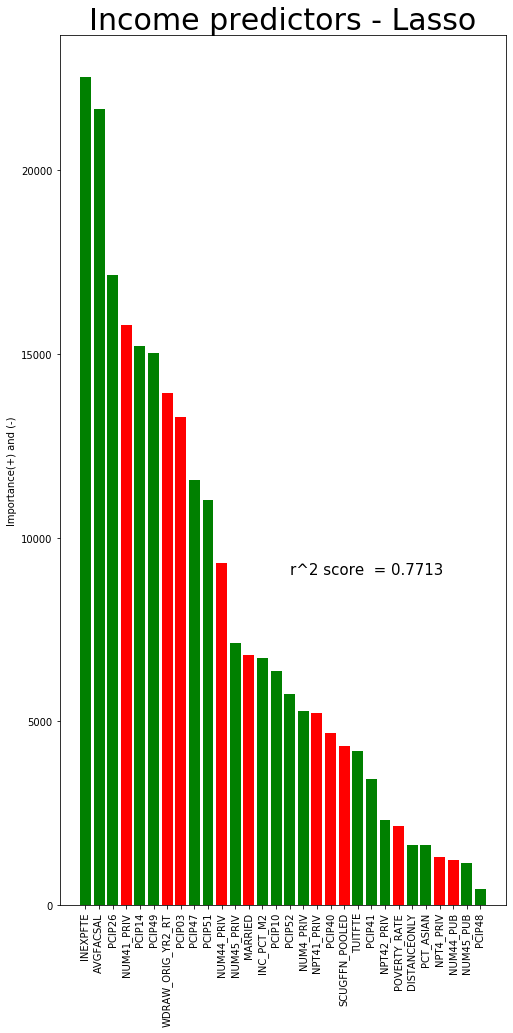

In [257]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
plt.rc('figure', titlesize=20)
plt.rc('axes', titlesize=30)
ax1.text(15, 9000, 'r^2 score  = %.4f'%(r2_test_score) , fontsize=15)
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)
ax1.set_ylabel("Importance(+) and (-)")
plt.show()
fig.savefig(path2 + 'lasso_income_predictor.png', format = 'png' , bbox_inches='tight')

In [178]:
column_headings_template_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
235      student                      Poverty rate, via Census data   
236      student                        Share of dependent students   
237      student                           Share of female students   
238      student                 Share of first-generation students   
239      student                          Share of married students   

                      developer-friendly name API data type VARIABLE NAME  
0               program.bachelors.agriculture       integer    CIP01BACHL  
1              program.bachelors.architecture       integer    CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer    CIP05BACHL  
3                program.bachelors.biological       integer    CIP26BACHL  
4        program.bachelors.business_marketing       integer    CIP52BACHL  
..                                        ...           ...           ...  
235                 demographics.poverty_rate         float  POVERTY_RATE  
236                    demographics.dependent         float     DEPENDENT  
237                 demographics.female_share         float        FEMALE  
238             demographics.first_generation         float     FIRST_GEN  
239                      demographics.married         float       MARRIED  

[240 rows x 5 columns]

In [139]:
#now lets do the elastic net model

In [140]:
X = X_base_line
y = y_baseline

In [141]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [142]:
columns = X.columns.to_list()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [144]:
y_train_nat = y_train

In [145]:
y_train = y_train.ravel().reshape(1,-1)

In [146]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [147]:
y_test = y_test.ravel().reshape(-1, 1)
y_test

array([[32300],
       [78600],
       [29100],
       [38700],
       [21100],
       [37400],
       [52200],
       [35800],
       [39600],
       [44300],
       [40300],
       [34200],
       [32200],
       [45500],
       [16100],
       [32500],
       [51900],
       [37100],
       [32600],
       [52000],
       [24900],
       [42300],
       [34300],
       [25400],
       [29100],
       [37100],
       [37600],
       [38400],
       [31400],
       [44600],
       [33300],
       [54200],
       [37800],
       [38500],
       [43600],
       [38800],
       [41500],
       [34200],
       [46700],
       [64700],
       [26300],
       [38400],
       [30900],
       [37700],
       [32600],
       [42500],
       [31600],
       [43600],
       [48200],
       [32600],
       [37600],
       [38400],
       [38600],
       [28100],
       [52100],
       [40500],
       [65500],
       [22500],
       [36500],
       [42200],
       [42200],
       [56500],
       [

In [148]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [149]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [150]:
y_test

array([[32300],
       [78600],
       [29100],
       [38700],
       [21100],
       [37400],
       [52200],
       [35800],
       [39600],
       [44300],
       [40300],
       [34200],
       [32200],
       [45500],
       [16100],
       [32500],
       [51900],
       [37100],
       [32600],
       [52000],
       [24900],
       [42300],
       [34300],
       [25400],
       [29100],
       [37100],
       [37600],
       [38400],
       [31400],
       [44600],
       [33300],
       [54200],
       [37800],
       [38500],
       [43600],
       [38800],
       [41500],
       [34200],
       [46700],
       [64700],
       [26300],
       [38400],
       [30900],
       [37700],
       [32600],
       [42500],
       [31600],
       [43600],
       [48200],
       [32600],
       [37600],
       [38400],
       [38600],
       [28100],
       [52100],
       [40500],
       [65500],
       [22500],
       [36500],
       [42200],
       [42200],
       [56500],
       [

In [151]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net_score = elastic_net
elastic_net

0.6908654666301455

In [152]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [153]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [154]:
elastic_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 477 out of 500 | elapsed:   17.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [155]:
predicted_y = elastic_random.predict(X_test)

In [156]:
elastic_random.score(X_test, y_test)

0.7875074812459312

In [157]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [158]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [159]:
model_best =elastic_random.best_estimator_

In [160]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [161]:
model_best.coef_

array([ 5.91963954e+02, -5.14024721e+02, -2.14837877e+02,  1.24411510e+03,
       -1.62383085e+03, -4.24625875e+02,  6.20281369e+02, -7.52151442e+02,
        1.01223030e+02, -2.19346227e+03,  1.19039001e+03, -8.13588119e+02,
       -5.35937905e+02, -6.46543966e+01, -6.80641038e+02,  1.26054374e+03,
        2.13814014e+03, -1.41913152e+03, -9.78682118e+02,  1.25271612e+02,
       -3.12376858e+02, -1.70853973e+03, -2.16311420e+02,  2.11413207e+03,
        4.17692848e+02,  9.82227983e+01, -1.00873424e+03,  3.05790642e+02,
       -7.58961440e+02,  7.64198568e+02, -5.19923737e+02, -3.78609176e+02,
        2.61565280e+02,  1.62691229e+02, -1.84968151e+02,  1.67503235e+02,
        8.07202525e+02, -1.75375918e+03, -3.37433477e+03, -2.37141069e+03,
        8.25056485e+01, -1.26116116e+03,  6.44648900e+03,  2.60341576e+03,
       -3.09736024e+03,  2.80032604e+03,  4.72187625e+03, -1.86130526e+03,
       -2.51325048e+03,  2.30602128e+03,  1.12694962e+04, -4.08060831e+03,
        4.77900123e+02, -

In [259]:
number_features = 30
rfe = RFE(estimator = model_best, n_features_to_select = number_features,  step=1)

In [263]:
results = rfe.fit(X_test, y_test.ravel())

In [312]:
elasticnet_score = results.score(X_test, y_test)
elasticnet_score

0.8365914368153822

In [267]:
results.ranking_

array([203, 140,  77, 114, 143, 155, 116, 136, 122,  14,  62,  50, 126,
        73, 151,  89,  61,  63, 125,  98, 149,  51, 103,  18,  12,  29,
        23,  17,  53,  59,  60,  74,  15,   8,  24, 109,  93,  46, 163,
       105,  26,  11,  30,   1, 139,   1,  42, 102,  54,  43,   1,   1,
        75,   1,   1,  36,  10,  78, 129, 154,   1,  71, 110,   1,   1,
        58,  76,   6, 120,  20, 118,  21,  55,  22,  92,   1,  39, 115,
       134,   1,  44, 144, 145,  27,  28,  19, 147,  79,  88, 132,  84,
       127,   5,  25, 152,  38,  94,  85, 117,  31,  90, 156,  91,   1,
        68, 107,  41,   9,   1, 131, 191, 193,  87, 197,  96, 201,  72,
       207, 123, 210,  99, 208,  35, 169,   1, 172, 100, 168,  33, 204,
        45, 190, 111, 167, 113, 186,  34, 159,   1, 180,  16, 157, 106,
       162, 171, 128, 141,  32, 188,  47, 170,  65, 183,   4, 185,  49,
       161,   1, 199,  82, 164,   1, 195, 101, 198,  67, 174,   7, 175,
        56, 165,  64,  13, 177, 200, 179, 187, 206, 194, 209, 18

In [268]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [298]:
elasticnet_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'VARIABLE NAME': columns, 'coefficient': model_best.coef_}

In [299]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [300]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [301]:
elasticnet_results_sorted_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False)

In [302]:
elasticnet_results_sorted_df

results_value  results_keep      VARIABLE NAME   coefficient  \
186              1          True          AVGFACSAL  16516.893942   
199              1          True           INEXPFTE  13182.780579   
50               1          True             PCIP14  11269.496236   
108              1          True  WDRAW_ORIG_YR2_RT -10528.490345   
76              39         False             PCIP50  -9232.339432   
..             ...           ...                ...           ...   
182            181         False     CIPTFBSANNUAL5      0.000000   
181            184         False           CIPTFBS4      0.000000   
180            182         False     CIPTFBSANNUAL4      0.000000   
179            209         False           CIPTFBS3      0.000000   
119            210         False        NPT45_OTHER      0.000000   

       abs(coef_)  
186  16516.893942  
199  13182.780579  
50   11269.496236  
108  10528.490345  
76    9232.339432  
..            ...  
182      0.000000  
181      0.000000  
180      0.000000  
179      0.000000  
119      0.000000  

[239 rows x 5 columns]

In [303]:
elasticnet_results_sorted_df = elasticnet_results_sorted_df[elasticnet_results_sorted_df['results_keep'].to_numpy()].drop(columns = ['results_value', 'results_keep'])
elasticnet_results_sorted_df['description']=0
elasticnet_results_sorted_df['long_name']=0
for index, row in elasticnet_results_sorted_df.iterrows():
    elasticnet_results_sorted_df.loc[index,'description'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'NAME OF DATA ELEMENT'].to_numpy()[0]
    elasticnet_results_sorted_df.loc[index,'long_name'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'developer-friendly name'].to_numpy()[0]

In [304]:
elasticnet_results_sorted_df

VARIABLE NAME   coefficient    abs(coef_)  \
186                 AVGFACSAL  16516.893942  16516.893942   
199                  INEXPFTE  13182.780579  13182.780579   
50                     PCIP14  11269.496236  11269.496236   
108         WDRAW_ORIG_YR2_RT -10528.490345  10528.490345   
54                     PCIP51   7900.437099   7900.437099   
204                   SCH_DEG   7843.439964   7843.439964   
75                     PCIP49   6951.314248   6951.314248   
64                     PCIP03  -6754.627659   6754.627659   
208                INC_PCT_H2   6339.328754   6339.328754   
213                FAMINC_IND   5976.656505   5976.656505   
53                     PCIP16  -4885.597936   4885.597936   
51                     PCIP23  -4080.608314   4080.608314   
103  FTFTPCTFLOAN_POOLED_SUPP  -3595.538216   3595.538216   
234              POVERTY_RATE  -2998.814608   2998.814608   
202                   TUITFTE   2881.735688   2881.735688   
45                     PCIP10   2800.326045   2800.326045   
237                 FIRST_GEN   2739.972656   2739.972656   
227                 PCT_ASIAN   2653.644686   2653.644686   
43                     PCIP52   2603.415762   2603.415762   
157                NUM45_PRIV   2229.568304   2229.568304   
124                NPT42_PRIV   1550.717788   1550.717788   
138             NPT4_75UP_PUB  -1543.383373   1543.383373   
60                     PCIP27   1507.133698   1507.133698   
232                    PCT_BA   1374.947690   1374.947690   
195              DISTANCEONLY   1355.105414   1355.105414   
63                     PCIP30  -1307.889659   1307.889659   
161                NUM42_PRIV    873.724647    873.724647   
235                 DEPENDENT   -816.381617    816.381617   
238                   MARRIED   -358.568676    358.568676   
79                    SATWR25    188.367357    188.367357   

                                           description  \
186                             Average faculty salary   
199  Instructional expenditures per full-time equiv...   
50       Percentage of degrees awarded in Engineering.   
108  Percent withdrawn from original institution wi...   
54   Percentage of degrees awarded in Health Profes...   
204     Predominant degree awarded (recoded 0s and 4s)   
75   Percentage of degrees awarded in Transportatio...   
64   Percentage of degrees awarded in Natural Resou...   
208  Aided students with family incomes between $11...   
213  Average family income for independent students...   
53   Percentage of degrees awarded in Foreign Langu...   
51   Percentage of degrees awarded in English Langu...   
103  Percentage of full-time, first-time degree/cer...   
234                      Poverty rate, via Census data   
202  Net tuition revenue per full-time equivalent s...   
45   Percentage of degrees awarded in Communication...   
237                 Share of first-generation students   
227  Percent of the population from students' zip c...   
43   Percentage of degrees awarded in Business, Man...   
157  Number of Title IV students, $110,000+ family ...   
124  Average net price for $30,001-$48,000 family i...   
138  Average net price for $75,000+ family income (...   
60   Percentage of degrees awarded in Mathematics A...   
232  Percent of the population from students' zip c...   
195         Flag for distance-education-only education   
63   Percentage of degrees awarded in Multi/Interdi...   
161  Number of Title IV students, $30,001-$48,000 f...   
235                        Share of dependent students   
238                          Share of married students   
79   25th percentile of SAT scores at the instituti...   

                                             long_name  
186                                     faculty_salary  
199                  instructional_expenditure_per_fte  
50                      program_percentage.engineering  
108                         title_iv.withdrawn_by.2yrs  
54                           program_per

In [317]:
elasticnet_results_sorted_df.to_csv(path2 + 'elasticnet_results_sorted_earnings_df.csv')

In [309]:
mask = elasticnet_results_sorted_df['coefficient'] > 0

In [310]:
x = elasticnet_results_sorted_df['VARIABLE NAME']
y = elasticnet_results_sorted_df['abs(coef_)']

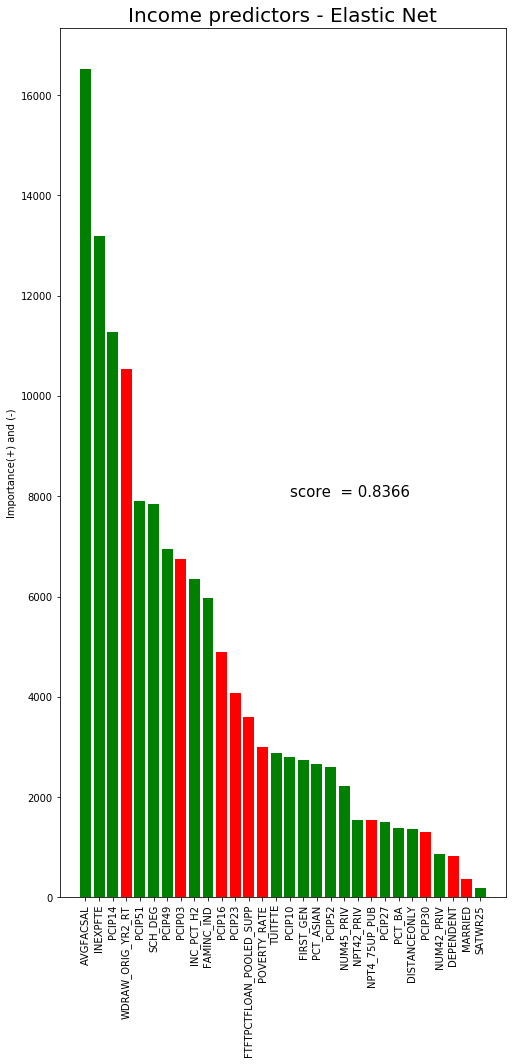

In [314]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Elastic Net")
plt.rc('figure', titlesize=30)
plt.rc('axes', titlesize=20)
ax1.text(15, 8000, 'score  = %.4f'%(elasticnet_score) , fontsize=15)
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)
ax1.set_ylabel("Importance(+) and (-)")
plt.show()
fig.savefig(path2 + 'elastic_net_income_predictor.png', format = 'png' , bbox_inches='tight')